In [131]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df=pd.read_csv("FB.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

#Set Parameters
split = int(df.shape[0] * 0.9)
lag = 60

Number of rows and columns: (2014, 7)


In [132]:
training_set = df.iloc[:split, 1:2].values
test_set = df.iloc[split:, 1:2].values

In [133]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with $lag time-steps and 1 output
X_train = []
y_train = []
for i in range(lag, split):
    X_train.append(training_set_scaled[i-lag:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [134]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
55/55 [==============================] - 6s 39ms/step - loss: 0.0431 - accuracy: 0.0012
Epoch 2/100
55/55 [==============================] - 2s 39ms/step - loss: 0.0048 - accuracy: 1.5022e-04
Epoch 3/100
55/55 [==============================] - 2s 39ms/step - loss: 0.0039 - accuracy: 1.7118e-04
Epoch 4/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0031 - accuracy: 6.9097e-04
Epoch 5/100
55/55 [==============================] - 2s 41ms/step - loss: 0.0036 - accuracy: 8.2633e-04 0s - loss: 0.0036 - accuracy: 
Epoch 6/100
55/55 [==============================] - 2s 41ms/step - loss: 0.0029 - accuracy: 0.0020
Epoch 7/100
55/55 [==============================] - 2s 41ms/step - loss: 0.0032 - accuracy: 0.0018
Epoch 8/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0028 - accuracy: 6.4837e-04
Epoch 9/100
55/55 [==============================] - 2s 41ms/step - loss: 0.0028 - accuracy: 7.3386e-04
Epoch 10/100
55/55 [=========================

55/55 [==============================] - 2s 40ms/step - loss: 8.6881e-04 - accuracy: 7.6115e-04
Epoch 80/100
55/55 [==============================] - 2s 38ms/step - loss: 7.9056e-04 - accuracy: 0.0022
Epoch 81/100
55/55 [==============================] - 2s 39ms/step - loss: 8.5935e-04 - accuracy: 0.0014
Epoch 82/100
55/55 [==============================] - 2s 39ms/step - loss: 8.6256e-04 - accuracy: 7.6321e-04
Epoch 83/100
55/55 [==============================] - 2s 37ms/step - loss: 9.0037e-04 - accuracy: 4.5840e-04
Epoch 84/100
55/55 [==============================] - 2s 37ms/step - loss: 7.8120e-04 - accuracy: 0.0030
Epoch 85/100
55/55 [==============================] - 2s 36ms/step - loss: 7.2458e-04 - accuracy: 7.6530e-04
Epoch 86/100
55/55 [==============================] - 2s 37ms/step - loss: 7.5774e-04 - accuracy: 0.0011
Epoch 87/100
55/55 [==============================] - 2s 38ms/step - loss: 8.0202e-04 - accuracy: 0.0013
Epoch 88/100
55/55 [==============================] 

In [138]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:split, 1:2]
dataset_test = df.iloc[split:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - lag:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(lag, df.shape[0] - split + lag):
    X_test.append(inputs[i-lag:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(202, 60, 1)


In [139]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

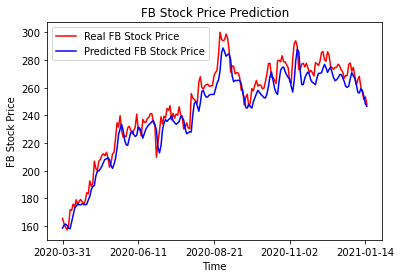

In [140]:
# Visualising the results
plt.plot(df.loc[split:, 'Date'],dataset_test.values, color = 'red', label = 'Real FB Stock Price')
plt.plot(df.loc[split:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted FB Stock Price')
plt.xticks(np.arange(0,df.shape[0] - split,50))
plt.title('FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show()